In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




In [4]:
df = pd.read_csv("zad2.csv") 

In [5]:
df["czas_dostawy_minuty"] = np.ceil(df["czas_dostawy"] / 60)


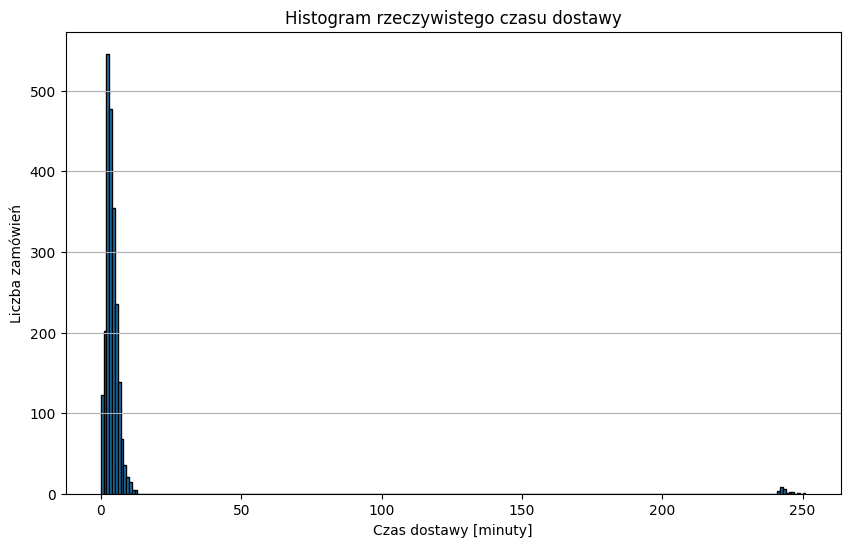

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df["czas_dostawy_minuty"], bins=range(0, int(df["czas_dostawy_minuty"].max()) + 2), edgecolor='black')
plt.xlabel("Czas dostawy [minuty]")
plt.ylabel("Liczba zamówień")
plt.title("Histogram rzeczywistego czasu dostawy")
plt.grid(axis="y")
plt.show()


In [7]:
plt.savefig("histogram_dostawy.png")


<Figure size 640x480 with 0 Axes>

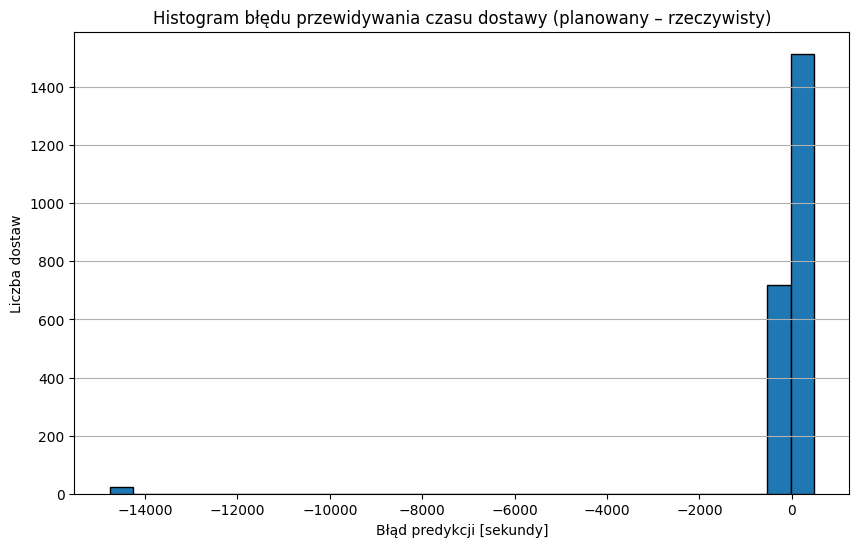

In [14]:

df = pd.read_csv("zad22.csv")
df["prediction_error"] = df["planned_delivery_duration"] - df["actual_duration"]

plt.figure(figsize=(10, 6))
plt.hist(df["prediction_error"], bins=30, edgecolor='black')
plt.xlabel("Błąd predykcji [sekundy]")
plt.ylabel("Liczba dostaw")
plt.title("Histogram błędu przewidywania czasu dostawy (planowany – rzeczywisty)")
plt.grid(axis="y")
plt.show()


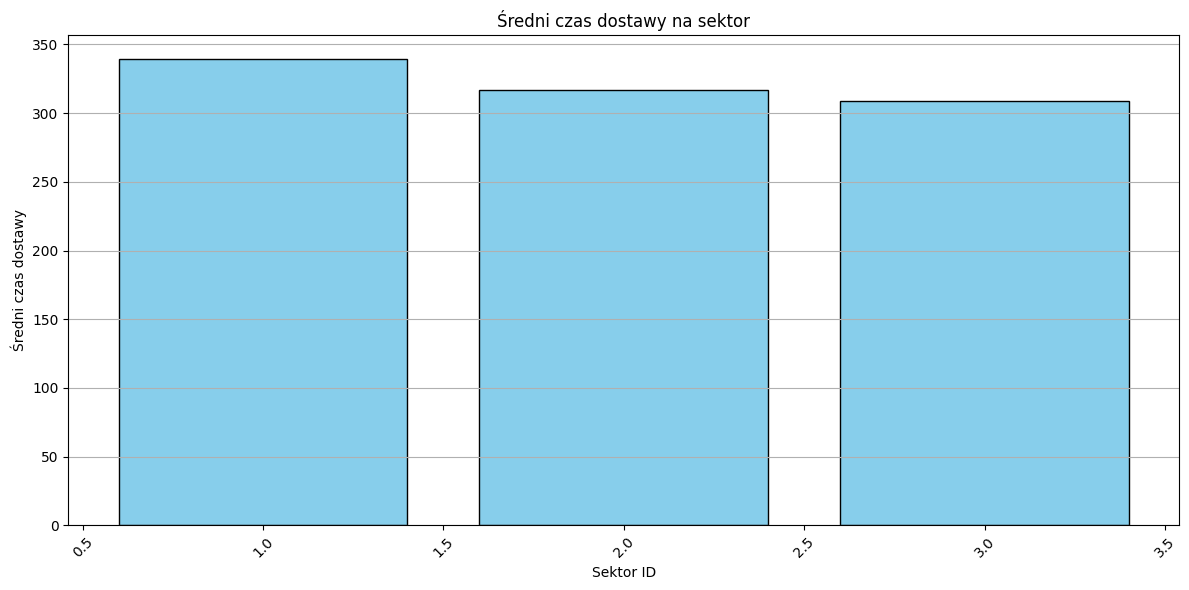

In [13]:

df = pd.read_csv("zad23.csv")

# Średni czas dostawy w sekundach dla każdego sektora
avg_by_sector = df.groupby("sector_id")["actual_duration"].mean().reset_index()

# Wykres słupkowy
plt.figure(figsize=(12, 6))
plt.bar(avg_by_sector["sector_id"], avg_by_sector["actual_duration"], color='skyblue', edgecolor='black')
plt.xlabel("Sektor ID")
plt.ylabel("Średni czas dostawy")
plt.title("Średni czas dostawy na sektor")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\igord\AppData\Local\Temp\ipykernel_3884\464915142.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_weight = df.groupby("weight_range")["actual_duration"].mean().reset_index()


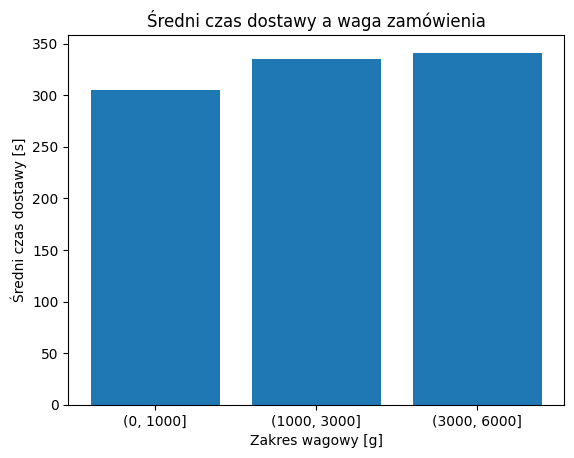

In [15]:
df = pd.read_csv("zad24.csv") 
df["total_weight"] = df["quantity"] * df["weight"]

# Grupowanie np. po przedziałach wagowych
df["weight_range"] = pd.cut(df["total_weight"], bins=[0, 1000, 3000, 6000, 10000])
avg_by_weight = df.groupby("weight_range")["actual_duration"].mean().reset_index()

# Wykres
plt.bar(avg_by_weight["weight_range"].astype(str), avg_by_weight["actual_duration"])
plt.title("Średni czas dostawy a waga zamówienia")
plt.xlabel("Zakres wagowy [g]")
plt.ylabel("Średni czas dostawy [s]")
plt.show()


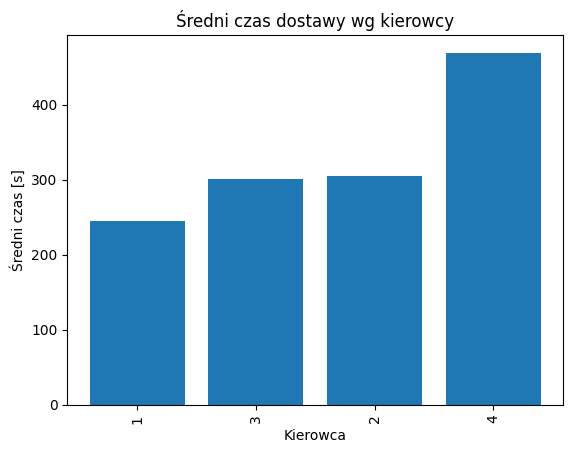

In [16]:
avg_by_driver = df.groupby("driver_id")["actual_duration"].mean().sort_values()

plt.bar(avg_by_driver.index.astype(str), avg_by_driver.values)
plt.title("Średni czas dostawy wg kierowcy")
plt.xlabel("Kierowca")
plt.ylabel("Średni czas [s]")
plt.xticks(rotation=90)
plt.show()


C:\Users\igord\AppData\Local\Temp\ipykernel_3884\3219949834.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_time = df.groupby("time_of_day")["actual_duration"].mean().reset_index()


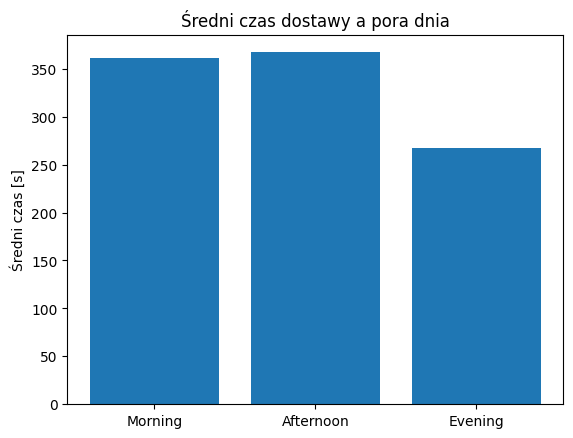

In [18]:
df["hour"] = pd.to_datetime(df["segment_start_time"], dayfirst=True).dt.hour

df["time_of_day"] = pd.cut(df["hour"], bins=[0, 9, 15, 24], labels=["Morning", "Afternoon", "Evening"])
avg_by_time = df.groupby("time_of_day")["actual_duration"].mean().reset_index()

plt.bar(avg_by_time["time_of_day"], avg_by_time["actual_duration"])
plt.title("Średni czas dostawy a pora dnia")
plt.ylabel("Średni czas [s]")
plt.show()
